In [14]:
%matplotlib inline
import torch
import torch.nn as nn
from torchvision import datasets
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import random

## Generate Spectrograms
Basically convert a .wav or .mp3

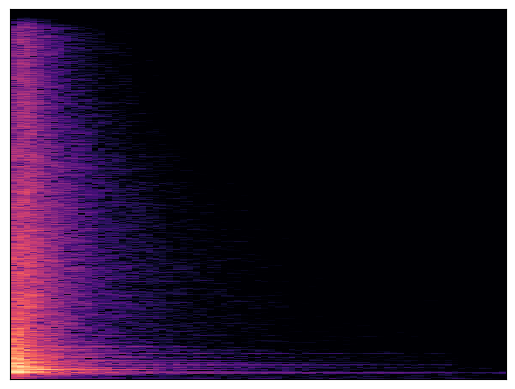

In [21]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Path to the audio file
file_path = "C:/Users/pilla/Desktop/Git/4114_Project/EEE4114F-Project/Sounds/Snares/3147__robbiesurp__dm_snare_ringger.wav"

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
    exit()

# Load the audio file
y, sr = librosa.load(file_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude spectrogram to decibels
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram without axis labels or scales
librosa.display.specshow(D_db, sr=sr, x_axis=None, y_axis=None)

# Save the spectrogram as a PNG file
output_dir = "C:/Users/pilla/Desktop"
output_file = os.path.join(output_dir, "spectrogram.png")
plt.savefig(output_file, bbox_inches='tight', pad_inches=0)

plt.show()


## Generate spectrograms for the first second
A spectrogram of fixed time length is computed for each audio file

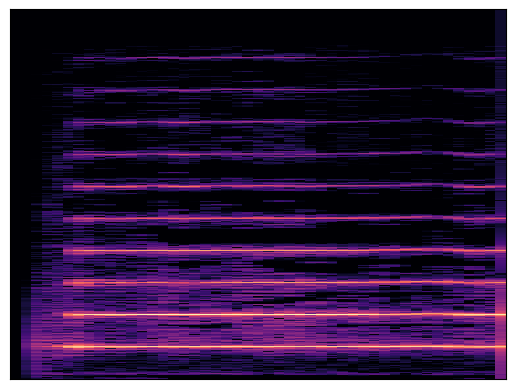

In [23]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Path to the audio file
# file_path = "C:/Users/pilla/Desktop/Git/4114_Project/EEE4114F-Project/Sounds/Snares/3147__robbiesurp__dm_snare_ringger.wav"
file_path = "C:/Users/pilla/Desktop/Git/4114_Project/EEE4114F-Project/Sounds/Trumpet/061658_trumpet-80868.mp3"

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
    exit()

# Load the audio file
y, sr = librosa.load(file_path, sr=None)

# Take only the first second of the audio
y_first_second = y[:sr]

# Compute the Short-Time Fourier Transform (STFT) of the first second
D = librosa.stft(y_first_second)

# Convert the amplitude spectrogram to decibels
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram without axis labels or scales
librosa.display.specshow(D_db, sr=sr, x_axis=None, y_axis=None)

# Save the spectrogram as a PNG file
output_dir = "C:/Users/pilla/Desktop"
output_file = os.path.join(output_dir, "spectrogram_first_second.png")
plt.savefig(output_file, bbox_inches='tight', pad_inches=0)

plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Path to your dataset directory
dataset_dir = ""

# List all image files in the dataset directory
image_files = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir) if file.endswith('.jpg')]

# Load images and their labels
images = []
labels = []

for file_path in image_files:
    # Load image
    img = load_img(file_path, target_size=(150, 150))  # Resize images to 150x150
    img_array = img_to_array(img)
    images.append(img_array)
    
    # Extract label from file name
    label = os.path.basename(file_path).split("_")[0]  # Assuming file names are like 'class1_xxx.jpg'
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Adjust output units based on the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
